#### 코드 참조 
[1] https://github.com/rickiepark/machine-learning-with-python-cookbook
[2] https://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html 
[3] https://github.com/mikexcohen/LinAlgBook/blob/main/python
[4] https://docs.sympy.org/latest/tutorial/matrices.html
[5] Dr. Jaewook Lee's Lecture Notes

# 2장 선형방정식

## 2.1 행렬의 랭크 구하기

In [1]:
# 라이브러리를 임포트합니다.
import numpy as np

# 행렬을 만듭니다.
A = np.array([[1, 1, 1],
                   [1, 1, 10],
                   [1, 1, 15]])

# 행렬의 랭크를 반환합니다.
np.linalg.matrix_rank(A)

2

## 2.2 행렬공간

In [2]:
## import libraries for the entire chapter
import numpy as np
from scipy.linalg import null_space

In [3]:
A = np.random.randn(3,4)

# the null space
null_space(A)

array([[-0.58077744],
       [ 0.63037813],
       [ 0.51376989],
       [ 0.0368983 ]])

In [4]:
# a reduced-rank matrix
A = np.random.randn(16,9) @ np.random.randn(9,11)

# null spaces
A_n = null_space(A)
A_ln = null_space(A.T)
r  = np.linalg.matrix_rank(A)
print(r)
# dimensionalities
print(A_n.shape[1]+r)
print(A_ln.shape[1]+r)

9
11
16


## 2.3 행렬식(determinant)과 norm 계산하기

In [5]:
# 라이브러리를 임포트합니다.
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

# 행렬을 만듭니다.
A = np.array([[1, 3, 5],
              [2, 5, 1],
              [2, 3, 8]])

# 행렬의 행렬식을 반환합니다.
linalg.det(A)

-25.000000000000004

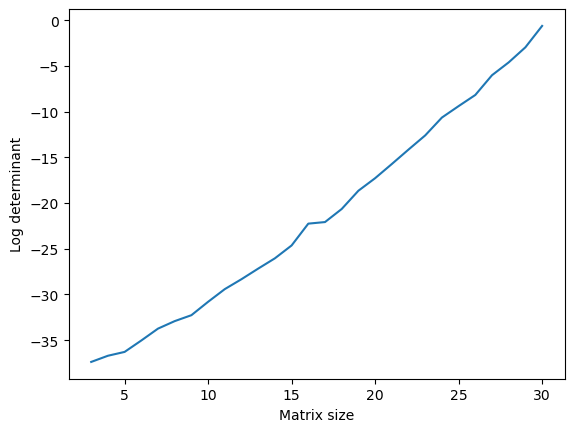

In [6]:
# matrix sizes
ns = np.arange(3,31)

# iteration
iters = 100

# initialize
dets = np.zeros((len(ns),iters))

# loop over matrix sizes
for ni in range(len(ns)):
    for i in range(iters):
        
        # step 1
        A = np.random.randn(ns[ni],ns[ni])
        
        # step 2
        A[:,0] = A[:,1]
        
        # step 3
        dets[ni,i]=np.abs(np.linalg.det(A))
        

# plotting
plt.plot(ns,np.log(np.mean(dets,axis=1)))
plt.xlabel('Matrix size')
plt.ylabel('Log determinant')
plt.show()

In [7]:
linalg.norm(A)

29.5394255641358

In [8]:
linalg.norm(A,'fro') # frobenius norm is the default

29.5394255641358

In [9]:
linalg.norm(A,1) # L1 norm (max column sum)

29.899608665363747

In [10]:
linalg.norm(A,-1) # min column sum

16.668183097998394

In [11]:
linalg.norm(A,np.inf) # L inf norm (max row sum)

33.36562719536212

##  2.4 선형방정식과 LU 분해

In [12]:
# 라이브러리를 임포트합니다.
import numpy as np
from scipy.linalg import lu

A = np.array([[1,3,5],[2,5,1],[2,3,8]])

In [13]:
# LU 분해합니다.
P, L, U = lu(A)
np.allclose(A - P @ L @ U, np.zeros((3, 3)))
print(P)
print(L),
print(U)

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]
[[ 1.    0.    0.  ]
 [ 1.    1.    0.  ]
 [ 0.5  -0.25  1.  ]]
[[ 2.    5.    1.  ]
 [ 0.   -2.    7.  ]
 [ 0.    0.    6.25]]


In [14]:
b = np.array([[10], [8], [3]])
y=np.linalg.solve(L, P.T@ b)
y

array([[ 8.  ],
       [-5.  ],
       [ 4.75]])

In [15]:
x=np.linalg.solve(U, y)
x

array([[-9.28],
       [ 5.16],
       [ 0.76]])

## 2.5 역행렬 구하기, 연립방정식 풀기

In [16]:
import numpy as np
from scipy import linalg
A = np.array([[1,3,5],[2,5,1],[2,3,8]])
A

array([[1, 3, 5],
       [2, 5, 1],
       [2, 3, 8]])

In [17]:
linalg.inv(A)

array([[-1.48,  0.36,  0.88],
       [ 0.56,  0.08, -0.36],
       [ 0.16, -0.12,  0.04]])

In [18]:
A.dot(linalg.inv(A)) #double check

array([[ 1.00000000e+00, -1.11022302e-16,  4.85722573e-17],
       [ 3.05311332e-16,  1.00000000e+00,  7.63278329e-17],
       [ 2.22044605e-16, -1.11022302e-16,  1.00000000e+00]])

In [19]:
# 행렬과 역행렬을 곱합니다.
A @ np.linalg.inv(A)

array([[ 1.00000000e+00,  1.11022302e-16, -6.24500451e-17],
       [-1.38777878e-16,  1.00000000e+00, -1.45716772e-16],
       [-2.22044605e-16,  0.00000000e+00,  1.00000000e+00]])

In [20]:
b = np.array([[10], [8], [3]])
b

array([[10],
       [ 8],
       [ 3]])

In [21]:
linalg.inv(A).dot(b)  # slow

array([[-9.28],
       [ 5.16],
       [ 0.76]])

In [22]:
A.dot(linalg.inv(A).dot(b)) - b  # check

array([[ 0.00000000e+00],
       [-1.77635684e-15],
       [-8.88178420e-16]])

In [23]:
np.linalg.solve(A, b)  # fast

array([[-9.28],
       [ 5.16],
       [ 0.76]])

In [24]:
A.dot(np.linalg.solve(A, b)) - b  # check

array([[ 0.00000000e+00],
       [-1.77635684e-15],
       [-1.77635684e-15]])

In [25]:
import numpy as np
from scipy.linalg import lu
import sympy as sym

A = np.array([[1,1, 2, -1],[4, 3, 6, -5],[-1, -2, -4, 0]])
A

array([[ 1,  1,  2, -1],
       [ 4,  3,  6, -5],
       [-1, -2, -4,  0]])

In [26]:
b = np.array([[-1], [-4], [1]])
b

array([[-1],
       [-4],
       [ 1]])

In [27]:
# LU 분해합니다.
P, L, U = lu(A)
print(P)
print(L),
print(U)

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]
[[ 1.    0.    0.  ]
 [-0.25  1.    0.  ]
 [ 0.25 -0.2   1.  ]]
[[ 4.00000000e+00  3.00000000e+00  6.00000000e+00 -5.00000000e+00]
 [ 0.00000000e+00 -1.25000000e+00 -2.50000000e+00 -1.25000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -2.77555756e-17 -1.38777878e-17]]


In [28]:
# 기약사다리꼴(rref)에서 pivot 위치 보여주기
# transform to sympy matrix for RREF
sym.Matrix(A).rref()

(Matrix([
 [1, 0, 0, -2],
 [0, 1, 2,  1],
 [0, 0, 0,  0]]),
 (0, 1))

In [29]:
# 기약사다리꼴(rref) 행렬을 심볼릭하게 보여주기
sym.Matrix(A).rref()[0]

Matrix([
[1, 0, 0, -2],
[0, 1, 2,  1],
[0, 0, 0,  0]])